主要流程：获取任务-获取数据-数据清洗-数据建模-模型评估
1.数据探索（探索性数据分析）—— BI商业智能
- 可视化
- 统计指标、数据分布
- 自变量和自变量分析，自变量和因变量的分析
2.数据清洗
- 缺失值、异常值处理
- 数据格式转换
3.特征工程
- 归一化、标准化
- 连续性变量离散化（分箱），字符型变量数值化
- 特征过滤（方差过滤、wrapper、filter过滤法）
- 特征重要性筛选
- 分类变量进行独热编码（哑变量）、PCA降维
- 特征构建，建立新特征
4.数据预处理
- 数据集划分
5.建立基础模型，尝试多种算法
6.模型调参、模型选择、模型的集成
7.系统上线、评估和测试（编程要求更高）
8.解释模型
9.数据分析报告（业务报告、技术报告）

In [1]:
import numpy as np
import pandas as pd

In [2]:
table = pd.read_csv('table_1.csv')
table.head()

,uid,roomid,orderlabel,star,rank,returnvalue,price_deduct,basic_maxarea,roomservice_1,roomservice_2,...,roomservice_6,roomservice_7,roomservice_8,basic_week_ordernum_ratio,basic_recent3_ordernum_ratio,basic_comment_ratio,basic_30days_ordnumratio,basic_30days_realratio,room_30days_ordnumratio,room_30days_realratio
0,USER_545,ROOM_1818649,0,11,9,410,2054,71.0,2,0,...,0,0,3,0.010893,0.000000,0.030880,0.038793,1.246535,0.029095,1.253572
1,USER_545,ROOM_1818645,0,11,5,200,1754,71.0,2,0,...,0,0,1,0.010893,0.000000,0.030880,0.038793,1.246535,0.029095,1.253572
2,USER_545,ROOM_1818667,0,11,7,200,4196,71.0,2,0,...,0,0,2,0.010893,0.000000,0.030880,0.038793,1.246535,NaN,NaN
3,USER_545,ROOM_18188319,0,11,19,200,1769,77.0,2,0,...,0,0,2,0.773420,0.820388,0.670532,0.693966,1.000773,NaN,NaN
4,USER_545,ROOM_1818515,0,11,5,200,7196,121.0,2,0,...,0,0,2,0.006536,0.000000,0.004159,0.002155,1.864469,NaN,NaN


In [3]:
table.tail() # 查看后5行数据

,uid,roomid,orderlabel,star,rank,returnvalue,price_deduct,basic_maxarea,roomservice_1,roomservice_2,...,roomservice_6,roomservice_7,roomservice_8,basic_week_ordernum_ratio,basic_recent3_ordernum_ratio,basic_comment_ratio,basic_30days_ordnumratio,basic_30days_realratio,room_30days_ordnumratio,room_30days_realratio
1094821,USER_132585,ROOM_106551615,0,9,15,200,1736,57.0,2,0,...,2,1,1,0.003226,0.000000,0.003645,0.007926,1.161693,NaN,NaN
1094822,USER_132585,ROOM_10655195,0,9,5,200,1544,57.0,2,0,...,2,1,1,0.003226,0.006711,0.004050,0.006605,1.165298,NaN,NaN
1094823,USER_132585,ROOM_10654897,0,9,7,200,1595,57.0,2,0,...,0,0,2,0.048387,0.033557,0.036452,0.054161,1.118951,0.005284,1.286603
1094824,USER_132585,ROOM_106549215,0,9,15,200,1676,57.0,2,0,...,2,1,1,0.048387,0.033557,0.036452,0.054161,1.118951,NaN,NaN
1094825,USER_132585,ROOM_106554411,0,9,11,200,1880,91.0,2,0,...,2,1,1,0.009677,0.013423,0.005670,0.017173,1.421518,0.005284,1.500170


In [4]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094826 entries, 0 to 1094825
Data columns (total 23 columns):
uid                             1094826 non-null object
roomid                          1094826 non-null object
orderlabel                      1094826 non-null int64
star                            1094826 non-null int64
rank                            1094826 non-null int64
returnvalue                     1094826 non-null int64
price_deduct                    1094826 non-null int64
basic_maxarea                   1094826 non-null float64
roomservice_1                   1094826 non-null int64
roomservice_2                   1094826 non-null int64
roomservice_3                   1094826 non-null int64
roomservice_4                   1092465 non-null float64
roomservice_5                   1094826 non-null int64
roomservice_6                   1094826 non-null int64
roomservice_7                   1094826 non-null int64
roomservice_8                   1094826 non-null int64
b

In [5]:
table.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
orderlabel,1094826.0,0.027880,0.164630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
star,1094826.0,8.557309,2.587717,1.000000,1.000000,5.000000,7.000000,9.000000,11.000000,11.000000,11.000000,11.000000
rank,1094826.0,11.066014,11.989792,3.000000,3.000000,3.000000,5.000000,9.000000,13.000000,21.000000,45.000000,545.000000
returnvalue,1094826.0,245.653320,331.135934,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,320.000000,842.000000,49121.000000
price_deduct,1094826.0,2901.513139,7969.097950,233.000000,491.000000,719.000000,1010.000000,1634.000000,2987.000000,5579.000000,16886.000000,780200.000000
basic_maxarea,1094826.0,87.329674,94.961413,-1.000000,23.000000,41.000000,53.000000,71.000000,101.000000,141.000000,311.000000,9701.000000
roomservice_1,1094826.0,1.922885,0.405660,-100.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
roomservice_2,1094826.0,0.115836,0.320028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
roomservice_3,1094826.0,0.990862,0.973913,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,3.000000,3.000000
roomservice_4,1092465.0,2.684520,0.947237,0.000000,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,5.000000,5.000000


In [6]:
# 查看缺失值的数量
table.isnull().sum()

uid                                  0
roomid                               0
orderlabel                           0
star                                 0
rank                                 0
returnvalue                          0
price_deduct                         0
basic_maxarea                        0
roomservice_1                        0
roomservice_2                        0
roomservice_3                        0
roomservice_4                     2361
roomservice_5                        0
roomservice_6                        0
roomservice_7                        0
roomservice_8                        0
basic_week_ordernum_ratio        32700
basic_recent3_ordernum_ratio     32700
basic_comment_ratio              32700
basic_30days_ordnumratio        124750
basic_30days_realratio          124750
room_30days_ordnumratio         457994
room_30days_realratio           457994
dtype: int64

In [7]:
# 查看缺失值的比例
table.isnull().mean()

uid                             0.000000
roomid                          0.000000
orderlabel                      0.000000
star                            0.000000
rank                            0.000000
returnvalue                     0.000000
price_deduct                    0.000000
basic_maxarea                   0.000000
roomservice_1                   0.000000
roomservice_2                   0.000000
roomservice_3                   0.000000
roomservice_4                   0.002157
roomservice_5                   0.000000
roomservice_6                   0.000000
roomservice_7                   0.000000
roomservice_8                   0.000000
basic_week_ordernum_ratio       0.029868
basic_recent3_ordernum_ratio    0.029868
basic_comment_ratio             0.029868
basic_30days_ordnumratio        0.113945
basic_30days_realratio          0.113945
room_30days_ordnumratio         0.418326
room_30days_realratio           0.418326
dtype: float64

In [8]:
# 样本标签分布
table['orderlabel'].value_counts()  # 不平衡的数据

0    1064302
1      30524
Name: orderlabel, dtype: int64

In [9]:
# 抽取5000条样本进行后续处理
table = table.sample(n=5000,random_state=0)
table

,uid,roomid,orderlabel,star,rank,returnvalue,price_deduct,basic_maxarea,roomservice_1,roomservice_2,...,roomservice_6,roomservice_7,roomservice_8,basic_week_ordernum_ratio,basic_recent3_ordernum_ratio,basic_comment_ratio,basic_30days_ordnumratio,basic_30days_realratio,room_30days_ordnumratio,room_30days_realratio
152985,USER_66532,ROOM_1265159,0,11,9,200,2123,63.0,2,0,...,0,0,2,0.027044,0.024540,0.026897,0.041193,1.548277,0.000615,1.546294
829023,USER_31054,ROOM_1690185,0,11,5,200,2828,117.0,2,0,...,0,0,2,0.028369,0.029412,0.044617,0.025316,1.153728,NaN,NaN
1054869,USER_14510,ROOM_3721927,0,11,7,200,2870,181.0,2,0,...,0,0,2,0.000000,0.000000,0.000000,0.005464,2.872571,0.002732,2.477143
1055199,USER_16338,ROOM_3622367,0,9,7,200,1208,101.0,1,0,...,0,0,4,0.019231,0.052632,0.004777,0.024390,1.629579,0.024390,1.641584
33904,USER_28086,ROOM_8181287,0,5,7,200,740,61.0,2,0,...,0,0,1,0.062500,0.111111,0.121622,0.092593,1.118302,NaN,NaN
518503,USER_67187,ROOM_70238811,0,9,11,200,1067,71.0,2,0,...,0,0,1,0.057971,0.073529,0.100981,0.075075,1.019390,0.009009,1.039546
851614,USER_40515,ROOM_3038345,0,11,45,200,5552,109.0,2,0,...,0,0,2,0.290441,0.294118,0.121907,0.215942,1.168006,NaN,NaN
201938,USER_44837,ROOM_2152179,0,9,9,200,1295,65.0,2,0,...,1,0,1,0.157088,0.161017,0.192961,0.151961,1.354383,0.006536,1.487910
888123,USER_94376,ROOM_43360411,0,5,11,200,497,25.0,2,0,...,1,0,5,0.187500,0.125000,0.150655,0.200000,1.004598,0.080000,1.000000
165439,USER_87333,ROOM_91382713,0,7,13,380,1217,81.0,2,0,...,1,0,3,0.041667,0.000000,0.044094,0.090909,1.452554,0.054545,1.503779


In [10]:
table['orderlabel'].value_counts()

0    4869
1     131
Name: orderlabel, dtype: int64

In [11]:
table.describe().T

,count,mean,std,min,25%,50%,75%,max
orderlabel,5000.0,0.026200,0.159746,0.000000,0.000000,0.000000,0.000000,1.000000
star,5000.0,8.564800,2.561701,1.000000,7.000000,9.000000,11.000000,11.000000
rank,5000.0,10.898000,11.434778,3.000000,5.000000,9.000000,13.000000,477.000000
returnvalue,5000.0,246.830000,397.040703,200.000000,200.000000,200.000000,200.000000,26543.000000
price_deduct,5000.0,2878.922000,7483.655634,272.000000,1016.000000,1607.000000,2969.000000,247061.000000
basic_maxarea,5000.0,86.480548,77.321125,-1.000000,51.000000,71.000000,97.000000,1777.000000
roomservice_1,5000.0,1.924000,0.333836,0.000000,2.000000,2.000000,2.000000,2.000000
roomservice_2,5000.0,0.119800,0.324760,0.000000,0.000000,0.000000,0.000000,1.000000
roomservice_3,5000.0,0.978000,0.974529,0.000000,0.000000,1.000000,2.000000,3.000000
roomservice_4,4994.0,2.683020,0.934809,0.000000,2.000000,2.000000,3.000000,5.000000


In [12]:
# 恢复索引
table.index = range(table.shape[0])
table.head()

,uid,roomid,orderlabel,star,rank,returnvalue,price_deduct,basic_maxarea,roomservice_1,roomservice_2,...,roomservice_6,roomservice_7,roomservice_8,basic_week_ordernum_ratio,basic_recent3_ordernum_ratio,basic_comment_ratio,basic_30days_ordnumratio,basic_30days_realratio,room_30days_ordnumratio,room_30days_realratio
0,USER_66532,ROOM_1265159,0,11,9,200,2123,63.0,2,0,...,0,0,2,0.027044,0.024540,0.026897,0.041193,1.548277,0.000615,1.546294
1,USER_31054,ROOM_1690185,0,11,5,200,2828,117.0,2,0,...,0,0,2,0.028369,0.029412,0.044617,0.025316,1.153728,NaN,NaN
2,USER_14510,ROOM_3721927,0,11,7,200,2870,181.0,2,0,...,0,0,2,0.000000,0.000000,0.000000,0.005464,2.872571,0.002732,2.477143
3,USER_16338,ROOM_3622367,0,9,7,200,1208,101.0,1,0,...,0,0,4,0.019231,0.052632,0.004777,0.024390,1.629579,0.024390,1.641584
4,USER_28086,ROOM_8181287,0,5,7,200,740,61.0,2,0,...,0,0,1,0.062500,0.111111,0.121622,0.092593,1.118302,NaN,NaN


#### 可视化

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
table1 = table[['uid','star','rank']]

In [15]:
table['star'].unique()  # 原始的大表中有类别3

array([11,  9,  5,  7,  1], dtype=int64)

In [16]:
table['rank'].unique()

array([  9,   5,   7,  11,  45,  13,  17,  39,  41,   3,  19,  21,  15,
        27,  29,  43,  23,  31,  25,  33,  37,  75, 477,  35,  57,  55,
        61,  51,  53,  59,  65,  47,  83, 175,  69,  49,  63,  77, 117,
       113, 103, 163, 161, 129], dtype=int64)

Text(0.5, 0, 'star')

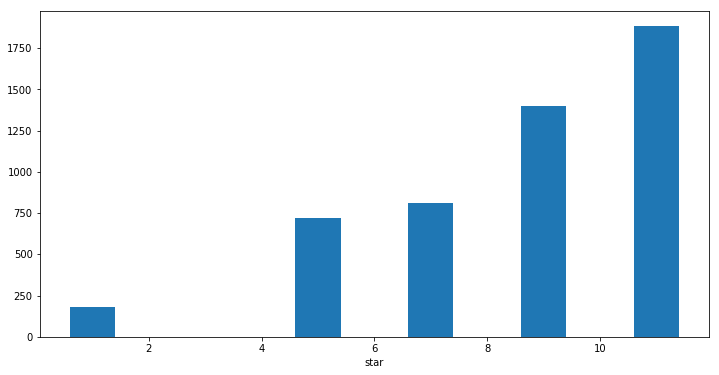

In [17]:
# 查看酒店级别的数量分布
fig,ax = plt.subplots(1,1)  # 建立子图画布
fig.set_size_inches(12,6)  # 设置画布大小  等同plt.figure(figsize=(12,6))
p = sns.color_palette()   # 使用seaborn的颜色
ax.bar(table1.iloc[:,1].value_counts().index,table1.iloc[:,1].value_counts(),
      color=p[0])
ax.set_xlabel(table1.iloc[:,1].value_counts().name)

In [18]:
table1.iloc[:,1].value_counts().name

'star'

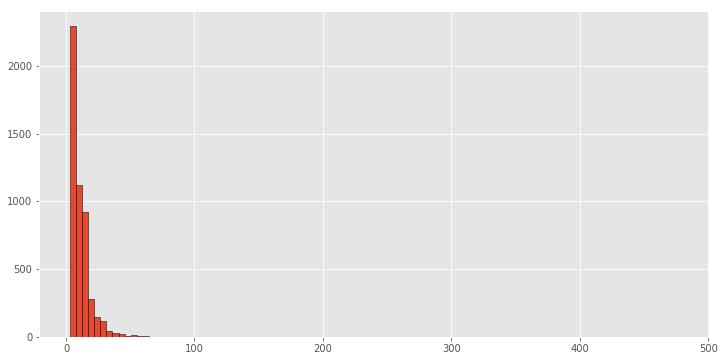

In [19]:
#直方图画房间的位置
plt.figure(figsize=(12,6))
plt.style.use('ggplot')

plt.hist(table1['rank'].dropna(),bins=100,edgecolor='k')
plt.show()

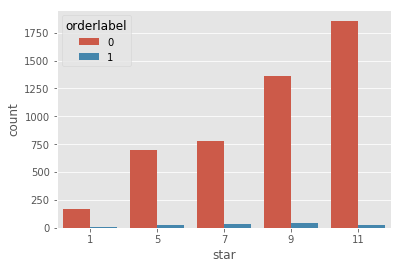

In [20]:
# 酒店级别和标签的关系  组合柱状图
sns.countplot(x=table1.iloc[:,1],hue='orderlabel',data=table)

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


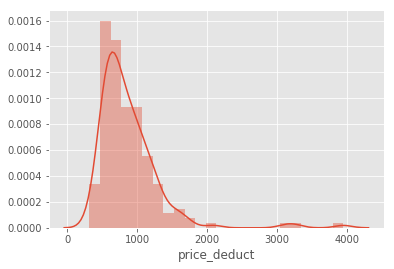

In [21]:
# 连续性变量可视化：price_deduct
sns.distplot(table[table['star']==1].price_deduct)

In [22]:
table.columns

Index(['uid', 'roomid', 'orderlabel', 'star', 'rank', 'returnvalue',
       'price_deduct', 'basic_maxarea', 'roomservice_1', 'roomservice_2',
       'roomservice_3', 'roomservice_4', 'roomservice_5', 'roomservice_6',
       'roomservice_7', 'roomservice_8', 'basic_week_ordernum_ratio',
       'basic_recent3_ordernum_ratio', 'basic_comment_ratio',
       'basic_30days_ordnumratio', 'basic_30days_realratio',
       'room_30days_ordnumratio', 'room_30days_realratio'],
      dtype='object')

In [23]:
# 多变量间的相关性分析(连续性数据的相关性)
char = [ 'returnvalue','price_deduct', 'basic_maxarea','basic_week_ordernum_ratio',
       'basic_recent3_ordernum_ratio','basic_30days_ordnumratio', 'basic_30days_realratio',
       'room_30days_ordnumratio', 'room_30days_realratio']

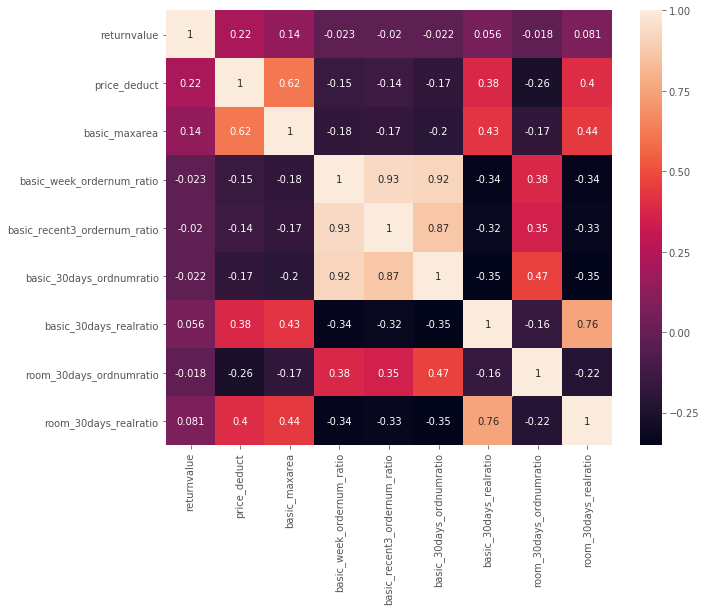

In [24]:
corrmat = table[char].corr()
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrmat,annot=True)

### 通过散点图分析共线特征

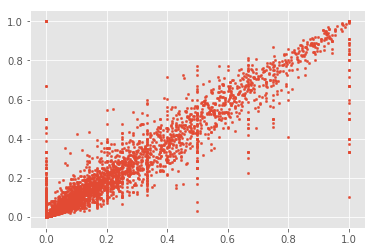

In [25]:
plot_data = table[['basic_week_ordernum_ratio',
       'basic_recent3_ordernum_ratio']]
plt.scatter(plot_data['basic_recent3_ordernum_ratio'],
        plot_data['basic_week_ordernum_ratio'],s=5)

#### 缺失值填充

In [26]:
table.isnull().sum()

uid                                0
roomid                             0
orderlabel                         0
star                               0
rank                               0
returnvalue                        0
price_deduct                       0
basic_maxarea                      0
roomservice_1                      0
roomservice_2                      0
roomservice_3                      0
roomservice_4                      6
roomservice_5                      0
roomservice_6                      0
roomservice_7                      0
roomservice_8                      0
basic_week_ordernum_ratio        129
basic_recent3_ordernum_ratio     129
basic_comment_ratio              129
basic_30days_ordnumratio         536
basic_30days_realratio           536
room_30days_ordnumratio         2080
room_30days_realratio           2080
dtype: int64

In [27]:
# 随机森林回归填补法
from sklearn.impute import SimpleImputer  # 简单填补法

ModuleNotFoundError: No module named 'sklearn.impute'

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
ind=[]
for i in table.columns:
    if table[i].isnull().any()==True:
        ind.append(i)

In [ ]:
df = table[ind]
df.columns

In [ ]:
for i in list(df.columns):
    # 构建新的特征和标签
    df1 = df
    fillc =df1.loc[:,i]   # 标签
    df1 = df1.loc[:,df.columns!=i]  # 新的特征矩阵
    
    # 在新特征矩阵中，对含有缺失值的列，进行0的填补
    df_0 = SimpleImputer(missing_values=np.nan,strategy='constant',
                        fill_value=0).fit_transform(df1)
    #找出训练集和测试集
    Ytrain = fillc[fillc.notnull()]  # 先提取标签
    Ytest = fillc[fillc.isnull()]
    Xtrain = df_0[Ytrain.index,:]  # 通过标签匹配
    Xtest = df_0[Ytest.index,:]
    # 用随机森林回归来填补缺失值
    rf = RandomForestRegressor(n_estimators=10)
    rf = rf.fit(Xtrain,Ytrain)
    Ypredict = rf.predict(Xtest)
    # 将填补好特征返回到我们的原始特征矩阵中
    df.loc[df.loc[:,i].isnull(),i]=Ypredict

In [ ]:
df.isnull().sum()

In [37]:
ind=[]
for i in table.columns:
    if table[i].isnull().any()==False:
        ind.append(i)

In [38]:
df2 = table[ind]

In [ ]:
# 拼接
table_reg = pd.concat([df2,df],axis=1)

In [ ]:
table_reg.info()

In [ ]:
# 均值填补法

In [34]:
ind=[]
for i in table.columns:
    if table[i].isnull().any()==True:
        ind.append(i)

In [31]:
df = table[ind]

In [35]:
for i in ind:
    df[i] = df[i].fillna(df[i].mean())

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
# 拼接
table_reg = pd.concat([df2,df],axis=1)

In [40]:
table_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
uid                             5000 non-null object
roomid                          5000 non-null object
orderlabel                      5000 non-null int64
star                            5000 non-null int64
rank                            5000 non-null int64
returnvalue                     5000 non-null int64
price_deduct                    5000 non-null int64
basic_maxarea                   5000 non-null float64
roomservice_1                   5000 non-null int64
roomservice_2                   5000 non-null int64
roomservice_3                   5000 non-null int64
roomservice_5                   5000 non-null int64
roomservice_6                   5000 non-null int64
roomservice_7                   5000 non-null int64
roomservice_8                   5000 non-null int64
roomservice_4                   5000 non-null float64
basic_week_ordernum_ratio       5000 non-null float64
b

#### 建模

In [42]:
# 分数据集
X = table_reg.iloc[:,3:]
Y = table_reg['orderlabel']

In [44]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=0)

In [45]:
Xtrain.shape

(4000, 20)

In [46]:
Xtest.shape

(1000, 20)

In [48]:
# 查看01比例
table['orderlabel'][table['orderlabel']==0].count()/table['orderlabel'][table['orderlabel']==1].count()

37.16793893129771

#### 决策树模型

In [49]:
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [50]:
clf = tree.DecisionTreeClassifier(criterion='gini',
                                 splitter='best', # 优先选择重要性特征为分支节点
                                 max_depth=5,
                                 min_samples_split=10,
                                 min_samples_leaf=5)
clf = clf.fit(Xtrain,Ytrain)
y_pred = clf.predict(Xtest)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [51]:
clf.score(Xtest,Ytest)

0.971

In [52]:
metrics.recall_score(Ytest,y_pred)

0.037037037037037035

In [53]:
from sklearn.metrics import classification_report
print(classification_report(Ytest,y_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.99       973
          1       0.25      0.04      0.06        27

avg / total       0.95      0.97      0.96      1000



In [58]:
# 调整样本权重
clf = tree.DecisionTreeClassifier(criterion='gini',
                                 splitter='best', # 优先选择重要性特征为分支节点
                                 max_depth=5,
                                 min_samples_split=10,
                                 min_samples_leaf=5,
                                 class_weight='balanced' # 输入字典形式或‘balanced’
                                 )
clf = clf.fit(Xtrain,Ytrain)
y_pred = clf.predict(Xtest)

In [59]:
print(clf.score(Xtest,Ytest))
metrics.recall_score(Ytest,y_pred)

0.75


0.8148148148148148

In [65]:
metrics.roc_auc_score(Ytest,ypred)

ValueError: Found input variables with inconsistent numbers of samples: [1000, 2000]

In [67]:
# 追求平衡
irange = np.linspace(1,40,20)
for i in irange:
    clf = tree.DecisionTreeClassifier(criterion='gini',
                                 splitter='best', # 优先选择重要性特征为分支节点
                                 max_depth=5,
                                 min_samples_split=10,
                                 min_samples_leaf=5,
                                 class_weight={1:i} # 输入字典形式或‘balanced’
                                 )
    clf = clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = metrics.recall_score(Ytest,y_pred)
    print('ratio 1:%f testing acc %f, recall is %f' % (i,score,recall))

ratio 1:1.000000 testing acc 0.971000, recall is 0.037037
ratio 1:3.052632 testing acc 0.969000, recall is 0.037037
ratio 1:5.105263 testing acc 0.942000, recall is 0.259259
ratio 1:7.157895 testing acc 0.942000, recall is 0.259259
ratio 1:9.210526 testing acc 0.908000, recall is 0.555556
ratio 1:11.263158 testing acc 0.908000, recall is 0.592593
ratio 1:13.315789 testing acc 0.869000, recall is 0.481481
ratio 1:15.368421 testing acc 0.840000, recall is 0.592593
ratio 1:17.421053 testing acc 0.824000, recall is 0.666667
ratio 1:19.473684 testing acc 0.815000, recall is 0.666667
ratio 1:21.526316 testing acc 0.821000, recall is 0.629630
ratio 1:23.578947 testing acc 0.815000, recall is 0.629630
ratio 1:25.631579 testing acc 0.807000, recall is 0.703704
ratio 1:27.684211 testing acc 0.807000, recall is 0.703704
ratio 1:29.736842 testing acc 0.810000, recall is 0.666667
ratio 1:31.789474 testing acc 0.810000, recall is 0.666667
ratio 1:33.842105 testing acc 0.748000, recall is 0.814815
ra

In [69]:
# SMOTE重采样
from imblearn.over_sampling import SMOTE

In [94]:
# 对训练数据做平衡处理
over_samples = SMOTE(random_state=1234)  # 实例化

In [95]:
over_samples

SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=1234, ratio='auto', svm_estimator=None)

In [70]:
over_samples_x,over_samples_y = over_samples.fit_sample(Xtrain,Ytrain)
over_x_test,over_y_test = over_samples.fit_sample(Xtest,Ytest)

In [71]:
# 重采样前的类别比例
Ytrain.value_counts()/len(Ytrain)

0    0.974
1    0.026
Name: orderlabel, dtype: float64

In [73]:
# 重采样后的类别比例
pd.Series(over_samples_y).value_counts()/len(over_samples_y)

1    0.5
0    0.5
dtype: float64

In [77]:
over_x_test.shape

(1946, 20)

In [80]:
# 再来看下模型
clf_1 = tree.DecisionTreeClassifier(criterion='gini',
                                 splitter='best', # 优先选择重要性特征为分支节点
                                 max_depth=5,
                                 min_samples_split=10,
                                 min_samples_leaf=5 )
clf_1= clf_1.fit(over_samples_x,over_samples_y)

pred2 = clf_1.predict(np.array(over_x_test))

In [83]:
pred2 = pred2.reshape(-1,1)

In [91]:
metrics.accuracy_score(over_y_test,pred2)

0.8473792394655704

In [92]:
from sklearn.metrics import classification_report
print(classification_report(over_y_test,pred2))

             precision    recall  f1-score   support

          0       0.82      0.89      0.85       973
          1       0.88      0.81      0.84       973

avg / total       0.85      0.85      0.85      1946



#### 特征重要性

In [103]:
feature_result = pd.DataFrame({'feature':list(table_reg.columns[3:]),
                              'importance':clf_1.feature_importances_}) 

In [106]:
# 查看前10个
feature_result = feature_result.sort_values('importance',ascending=False).reset_index(drop=True)

In [108]:
feature_result.head(10)

,feature,importance
0,room_30days_ordnumratio,0.391810
1,rank,0.257085
2,roomservice_5,0.220417
3,basic_30days_ordnumratio,0.042899
4,roomservice_8,0.032383
5,basic_week_ordernum_ratio,0.019142
6,room_30days_realratio,0.013645
7,roomservice_6,0.010737
8,price_deduct,0.005056
9,basic_maxarea,0.003325


#### 基于重要性进行特征选择

In [109]:
# 提取前10个特征名字
most_imp = feature_result['feature'][:10]
# 找到特征所对应的的索引
ind = [list(table_reg.columns[3:]).index(x) for x in most_imp]

In [111]:
# 保留特征重要性高的数据
x_reduce = over_samples_x[:,ind]
x_test_reduce = over_x_test[:,ind]

In [112]:
x_reduce.shape

(7792, 10)

In [113]:
clf_2 = tree.DecisionTreeClassifier(criterion='gini',
                                 splitter='best', # 优先选择重要性特征为分支节点
                                 max_depth=5,
                                 min_samples_split=10,
                                 min_samples_leaf=5 )
clf_2= clf_2.fit(x_reduce,over_samples_y)

pred = clf_2.predict(np.array(x_test_reduce))
print(classification_report(over_y_test,pred))

             precision    recall  f1-score   support

          0       0.82      0.89      0.85       973
          1       0.88      0.81      0.84       973

avg / total       0.85      0.85      0.85      1946



In [114]:
metrics.accuracy_score(over_y_test,pred)

0.8489208633093526

#### XGboost模型

In [115]:
import xgboost as xgb

In [116]:
# 数据类型转换
dtrain = xgb.DMatrix(x_reduce,over_samples_y)
dtest = xgb.DMatrix(x_test_reduce)

In [117]:
# 设置参数
params = {'booster':'gbtree',
         'objective':'binary:logistic', # 二分类
         'eval_metric':'auc',
         'max_depth':5,
         'subsample':1,
         'colsample_bytree':1,
         'min_child_weight':5,
         'eta':0.01,
         'nthread': 8,  # 调用CPU的线程数 
         'silent':True}  # 开启静默模式

In [118]:
# 观测每次迭代的模型的评估分数
watchlist = [(dtrain,'train')]

In [119]:
# 训练模型
bst = xgb.train(params,dtrain,num_boost_round=100,evals=watchlist)
ypred = bst.predict(dtest)  # 预测分数

# 设置阈值，输出标签取值
y_pred = (ypred>=0.5)*1

from sklearn import metrics
print('AUC: %.4f'% metrics.roc_auc_score(over_y_test,ypred))  # 预测分数
print('ACC: %.4f'% metrics.accuracy_score(over_y_test,y_pred))  # 使用预测标签
print('Recall: %.4f'% metrics.recall_score(over_y_test,y_pred))
print('F1-score: %.4f'% metrics.f1_score(over_y_test,y_pred))
print('precision: %.4f'% metrics.precision_score(over_y_test,y_pred))
metrics.confusion_matrix(over_y_test,y_pred)

[0]	train-auc:0.961725
[1]	train-auc:0.961547
[2]	train-auc:0.96307
[3]	train-auc:0.964896
[4]	train-auc:0.96528
[5]	train-auc:0.965767
[6]	train-auc:0.973075
[7]	train-auc:0.976335
[8]	train-auc:0.976504
[9]	train-auc:0.976522
[10]	train-auc:0.976433
[11]	train-auc:0.977995
[12]	train-auc:0.979462
[13]	train-auc:0.980283
[14]	train-auc:0.98074
[15]	train-auc:0.980998
[16]	train-auc:0.981582
[17]	train-auc:0.98163
[18]	train-auc:0.982135
[19]	train-auc:0.98203
[20]	train-auc:0.98255
[21]	train-auc:0.982821
[22]	train-auc:0.982645
[23]	train-auc:0.983096
[24]	train-auc:0.982776
[25]	train-auc:0.982951
[26]	train-auc:0.983004
[27]	train-auc:0.983215
[28]	train-auc:0.98315
[29]	train-auc:0.983026
[30]	train-auc:0.983261
[31]	train-auc:0.983383
[32]	train-auc:0.98358
[33]	train-auc:0.983631
[34]	train-auc:0.983857
[35]	train-auc:0.98389
[36]	train-auc:0.983865
[37]	train-auc:0.983923
[38]	train-auc:0.98404
[39]	train-auc:0.984178
[40]	train-auc:0.98419
[41]	train-auc:0.984247
[42]	train-au

array([[882,  91],
       [ 88, 885]], dtype=int64)

#### 其他模型

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
model1 = LogisticRegression().fit(x_reduce,over_samples_y)
model1.score(x_test_reduce,over_y_test)

0.8448098663926003

In [122]:
metrics.recall_score(over_y_test,model1.predict(x_test_reduce))

0.8900308324768756

In [123]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=100).fit(x_reduce,over_samples_y)
model2.score(x_test_reduce,over_y_test)

0.9044193216855088

In [124]:
metrics.recall_score(over_y_test,model2.predict(x_test_reduce))

0.8201438848920863

#### 调参

#### 网格搜索调整决策树参数

In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
# 设置参数可取值
param_grid = {'criterion':['entropy','gini'],
             'max_depth':range(2,10),
             'min_samples_split':range(2,30,2),
             'min_samples_leaf':range(1,10)}

In [127]:
# 设置参数网格
reg = GridSearchCV(tree.DecisionTreeClassifier(),param_grid,cv=5)
# 建模
reg.fit(x_reduce,over_samples_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': range(2, 10), 'min_samples_split': range(2, 30, 2), 'min_samples_leaf': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [128]:
# 最优参数取值下的最高分数
reg.best_score_

0.9435318275154004

In [129]:
# 最优参数组合
reg.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [130]:
clf_2 = tree.DecisionTreeClassifier(criterion='gini',
                                 splitter='best', # 优先选择重要性特征为分支节点
                                 max_depth=9,
                                 min_samples_split=6,
                                 min_samples_leaf=1 )
clf_2= clf_2.fit(x_reduce,over_samples_y)

pred = clf_2.predict(np.array(x_test_reduce))
print(classification_report(over_y_test,pred))

             precision    recall  f1-score   support

          0       0.79      0.94      0.86       973
          1       0.92      0.75      0.83       973

avg / total       0.86      0.84      0.84      1946



In [131]:
clf_2.score(x_test_reduce,over_y_test)

0.843268242548818

1.定义评估指标：MSE、MAE、网格搜索、交叉验证
2.参数调节：先调对模型影响较大的参数
- 选择一组初始参数
- 改变max_depth和 min_child_weight 调节树模型的复杂程度
- 调节gamma 降低模型的过拟合风险
- 调节subsample和colsample_bytree 改变数据采样策略
- 调节学习率eta

In [132]:
from sklearn.metrics import mean_absolute_error,make_scorer

In [133]:
# 定义MAE 平均绝对误差
def xg_eval_mae(yhat,dtrain):
    y = dtrain.get_label()
    return 'mae',mean_absolute_error(np.exp(y),np.exp(yhat))

In [134]:
# xgboost交叉验证
bst_cv = xgb.cv(params,dtrain,num_boost_round=100,nfold=3,
                feval=xg_eval_mae)

In [135]:
bst_cv

,train-auc-mean,train-auc-std,train-mae-mean,train-mae-std,test-auc-mean,test-auc-std,test-mae-mean,test-mae-std
0,0.956588,0.005652,0.853515,0.000552,0.949491,0.003195,0.853632,0.000833
1,0.958446,0.005173,0.847881,0.000721,0.952995,0.005500,0.848080,0.000693
2,0.958366,0.005285,0.842332,0.000911,0.952625,0.005242,0.842608,0.000556
3,0.959375,0.005108,0.836821,0.001095,0.953982,0.004993,0.837189,0.000396
4,0.960468,0.004531,0.831367,0.001279,0.956164,0.003296,0.831800,0.000263
5,0.960435,0.004702,0.826028,0.001428,0.955988,0.003079,0.826558,0.000204
6,0.961938,0.006298,0.820725,0.001550,0.957578,0.004557,0.821277,0.000162
7,0.964401,0.006038,0.815445,0.001742,0.960284,0.002386,0.816045,0.000235
8,0.965049,0.006793,0.810226,0.001888,0.960731,0.002866,0.810861,0.000373
9,0.966791,0.007246,0.805002,0.001968,0.962567,0.002537,0.805726,0.000383


<Figure size 432x288 with 0 Axes>

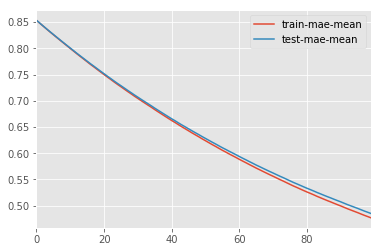

In [136]:
plt.figure()
bst_cv[['train-mae-mean','test-mae-mean']].plot()

#### 树的深度和节点权重

In [137]:
from xgboost import XGBRegressor

In [138]:
xgb_param_grid = {'max_depth':list(range(2,10)),
                 'min_child_weight':list(range(1,10))}
xgb_param_grid

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9]}

In [140]:
grid = GridSearchCV(XGBRegressor(n_estimators=100),
                   xgb_param_grid,cv=5)
grid.fit(x_reduce,over_samples_y)

[16:33:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:25] WARNI

[16:33:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:58] WARNI

[16:34:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:34:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:34:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:34:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:34:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:34:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:34:42] WARNI

[16:35:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:37] WARNI

[16:36:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:36:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:36:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:36:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:36:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:36:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:36:44] WARNI

[16:37:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:37:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:37:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:37:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:38:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:38:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:38:04] WARNI

[16:39:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:38] WARNI

[16:41:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:24] WARNI

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [141]:
grid.best_params_

{'max_depth': 9, 'min_child_weight': 8}

#### gamma降低过拟合风险

In [142]:
xgb_param_grid = {'gamma':[0.1 * i for i in range(0,5)]}

In [ ]:
grid = GridSearchCV(XGBRegressor(eta=0.1,max_depth=9, min_child_weight=8  
                                ),xgb_param_grid,cv=5)
grid.fit(x_reduce,over_samples_y)

[16:42:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:42:53] WARNI

[16:43:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:43:27] WARNI

[16:44:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:44:12] WARNI

[16:45:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [145]:
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'